In [88]:
import sys
import os
if './solution-guidance' not in sys.path:
    sys.path.insert(0, './solution-guidance')

In [95]:
from cslib import *
import matplotlib.pyplot as plt

In [90]:
data_dir = os.path.join(".","data","cs-train")
print("...fetching data")

ts_all = fetch_ts(data_dir,clean=True)

...fetching data
... processing data for loading


In [91]:
ts_all.keys()

dict_keys(['all', 'united_kingdom', 'eire', 'germany', 'france', 'norway', 'spain', 'hong_kong', 'portugal', 'singapore', 'netherlands'])

In [93]:
df = ts_all['all']
X, y, dates=engineer_features(df)

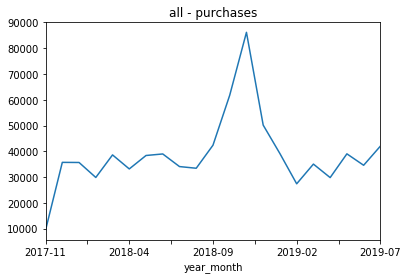

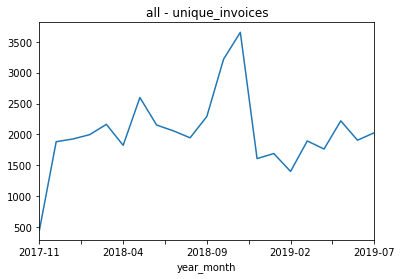

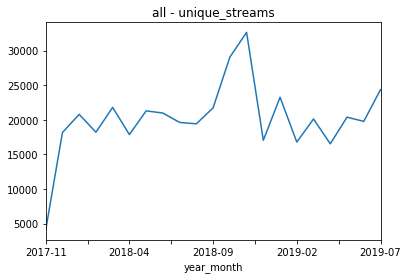

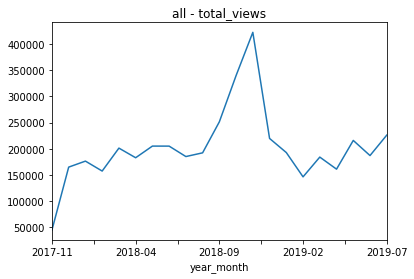

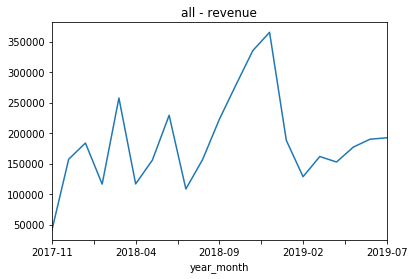

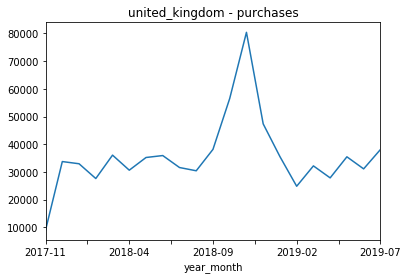

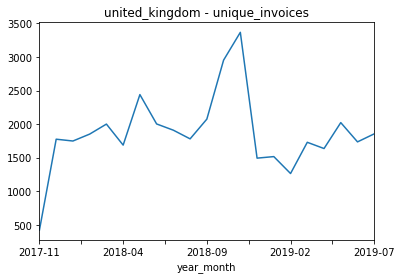

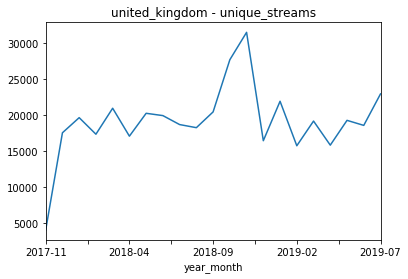

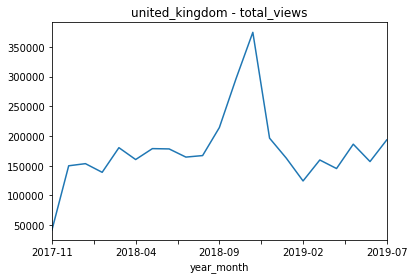

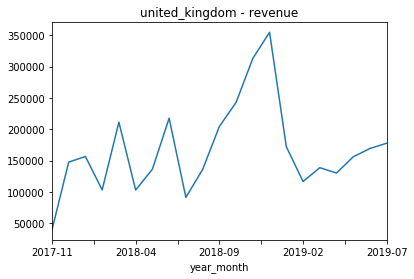

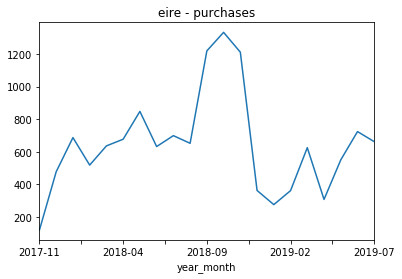

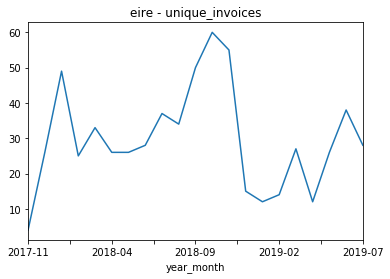

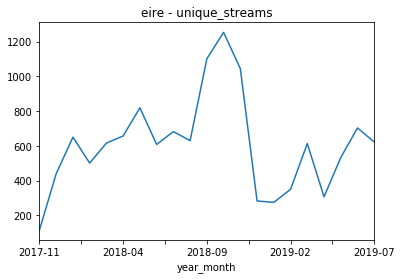

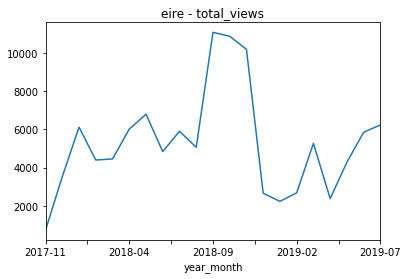

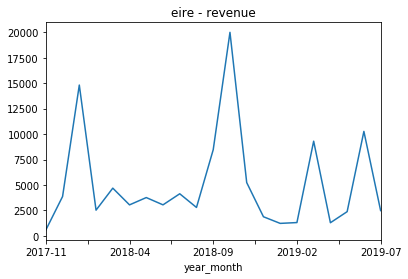

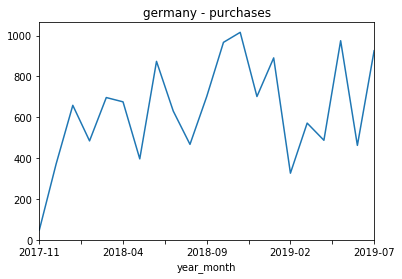

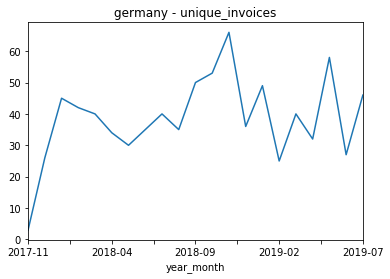

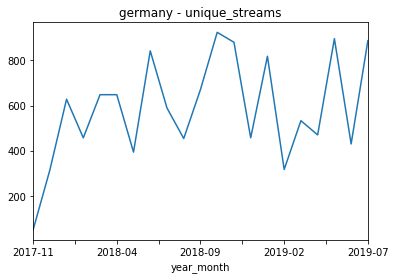

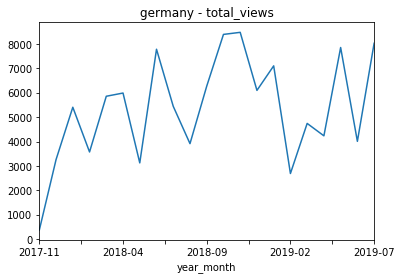

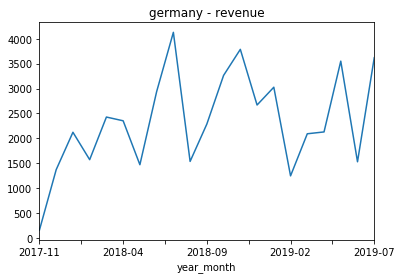

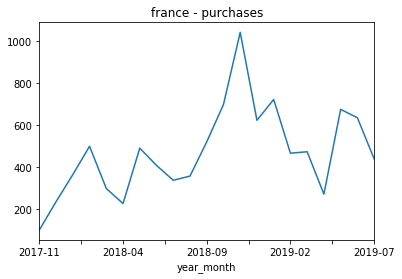

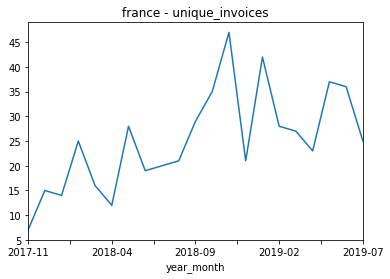

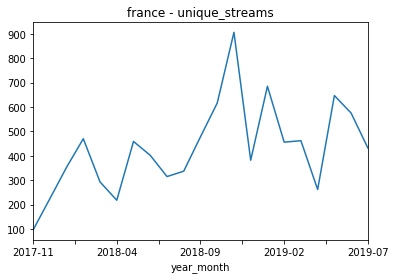

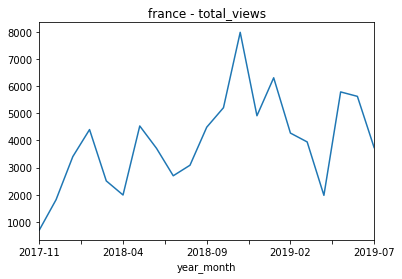

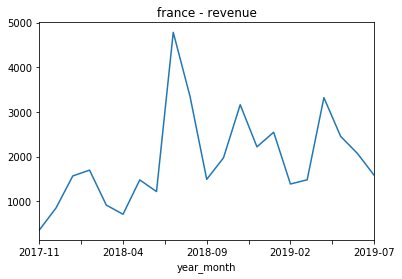

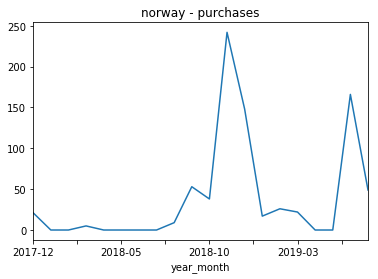

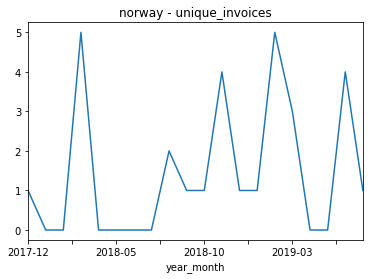

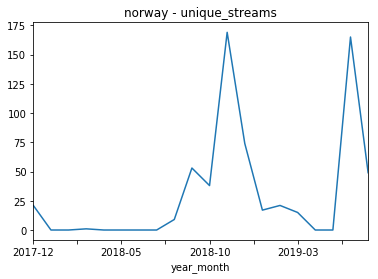

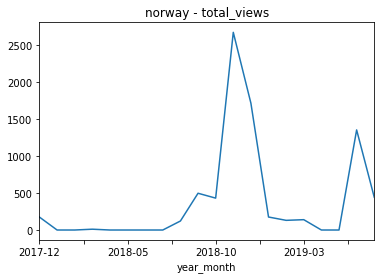

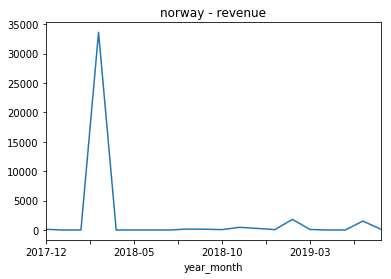

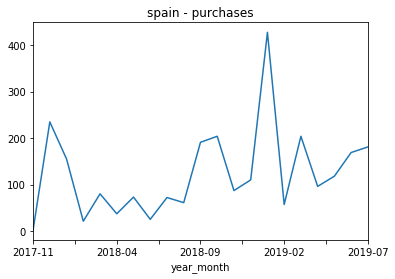

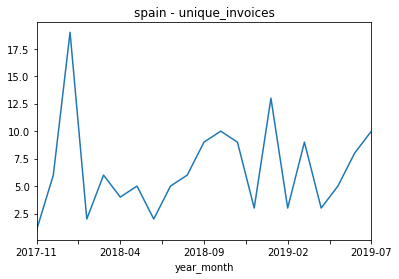

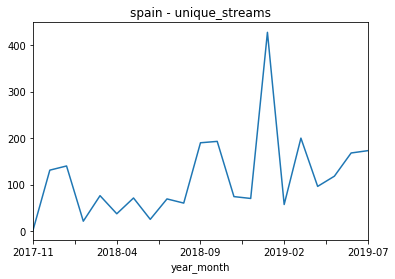

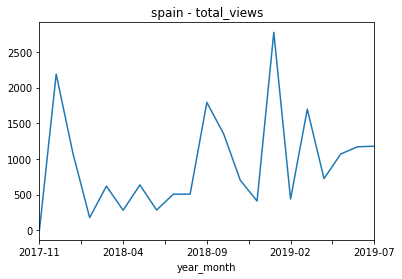

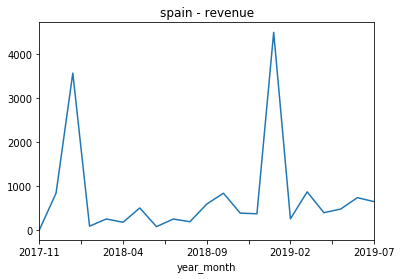

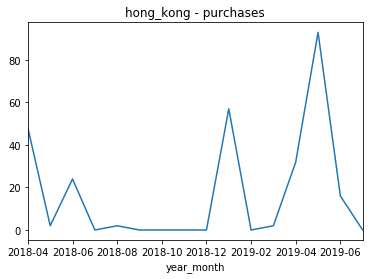

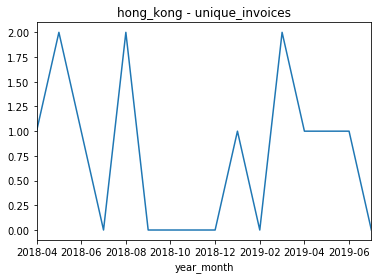

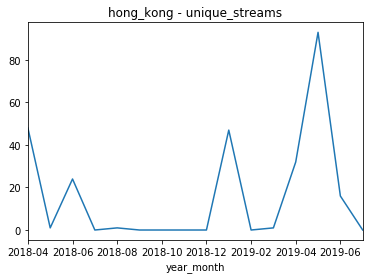

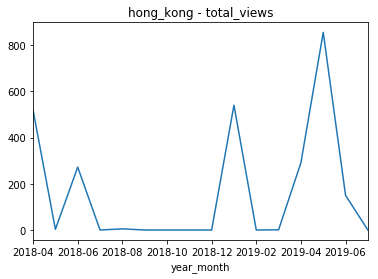

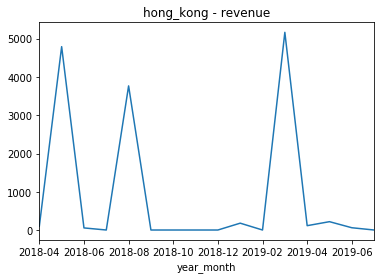

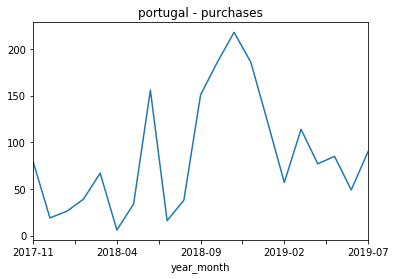

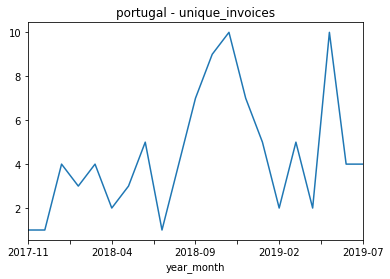

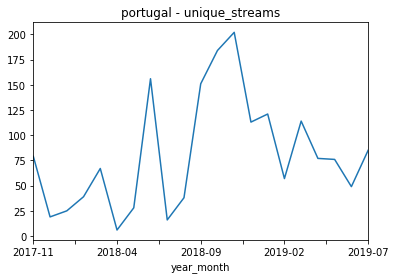

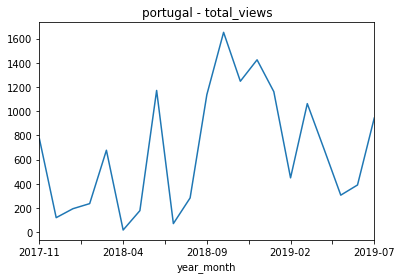

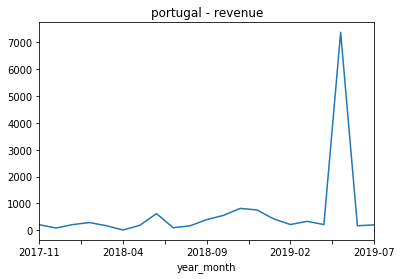

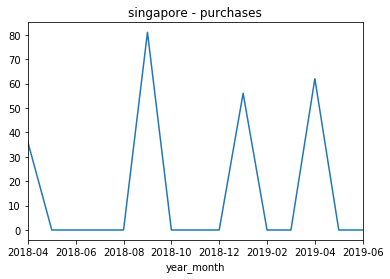

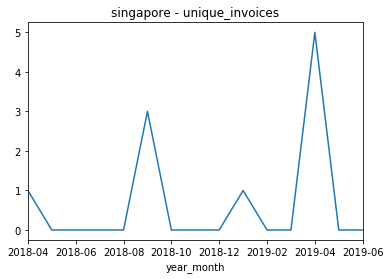

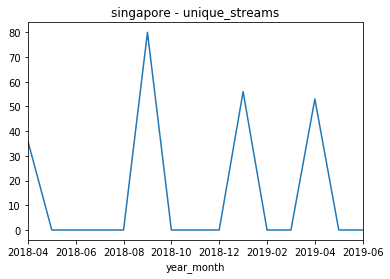

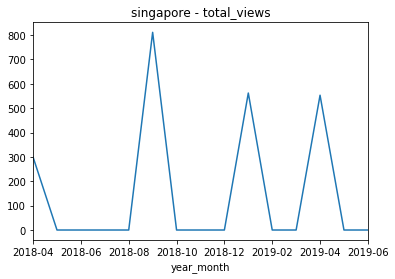

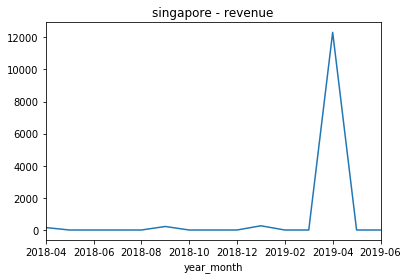

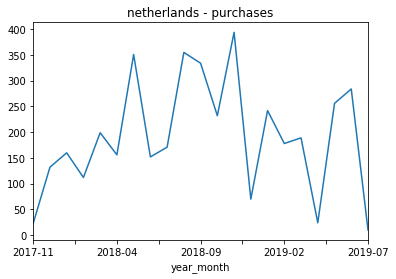

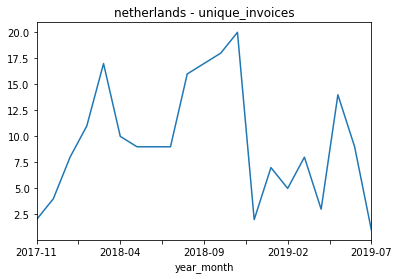

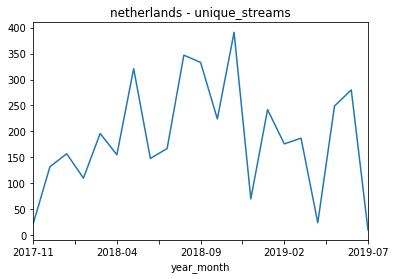

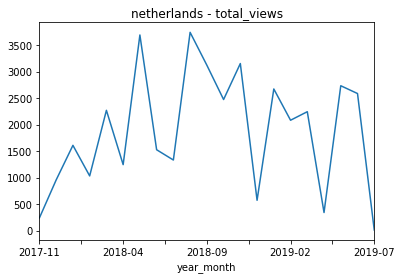

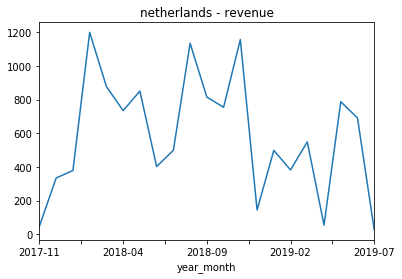

In [96]:
# From the following plots we can see correlation between revenue and the other features, at least for "all" and "united kindom" countries

for country in ts_all.keys():
    for column in ['purchases', 'unique_invoices', 'unique_streams', 'total_views', 'revenue']:
        ax = ts_all[country].groupby('year_month')[column].sum().plot.line(title=country + ' - ' +column)
        plt.show()

In [61]:
# Test predict (Flask and Docker APIs)
import requests

country='united_kingdom'
year='2019'
month='07'
day='15'

## data needs to be in dict format for JSON
query = {'query':{'country':country,'year':year,'month':month,'day':day},'type':'dict', 'mode': 'test'}

## test the Flask API
port = 8080
r = requests.post('http://127.0.0.1:{}/predict'.format(port),json=query)

## test the Docker API
#port = 4000
#r = requests.post('http://127.0.0.1:{}/predict'.format(port),json=query)

print(r.text)

{"y_pred":[113949.17799999999],"y_proba":null}



In [97]:
# Test log (Flask and Docker APIs)

## test the Flask API
port = 8080
r = requests.get('http://127.0.0.1:{}/logs/predict-2021-4.log'.format(port))

## test the Docker API
#port = 4000
#r = requests.get('http://127.0.0.1:{}/logs/predict-2021-4.log'.format(port))

print(r.text)

In [98]:
# Test train with new invoices data (Flask and Docker APIs)
#query = {'mode':'test'}
query = {'clean':'false'} # set clean true when we add new invoices data to cs-train folder

## test the Flask API
port = 8080
r = requests.post('http://127.0.0.1:{}/train'.format(port),json=query)

## test the Docker API
#port = 4000
#r = requests.post('http://127.0.0.1:{}/train'.format(port),json=query)

print(r.text)

true



In [36]:
# Monitoring tool (only "all" and "united kindom" models)
!python ./monitoring.py

country =  all
outlier_X 2.4
wasserstein_X 0.09
wasserstein_y 11608.97
country =  united_kingdom
outlier_X 2.2
wasserstein_X 0.09
wasserstein_y 10572.81
done


In [37]:
# Unit Test for Logger
!python ./unittests/LoggerTests.py

....
----------------------------------------------------------------------
Ran 4 tests in 0.039s

OK


In [70]:
# Unit Test for API
!python ./unittests/ApiTests.py

....
----------------------------------------------------------------------
Ran 4 tests in 44.886s

OK


In [84]:
# Unit Test for model
!python ./unittests/ModelTests.py

... test flag on
...... subsetting data
...... subsetting countries
... loading ts data from files
... saving test version of model: models\test-all-0_1.joblib
... saving test version of model: models\test-united_kingdom-0_1.joblib
... loading ts data from files
... loading ts data from files
2019-05-15
2019-05-15


...
----------------------------------------------------------------------
Ran 3 tests in 94.732s

OK


In [87]:
# Run all unit tests
!python run-tests.py

... test flag on
...... subsetting data
...... subsetting countries
... loading ts data from files
... saving test version of model: models\test-all-0_1.joblib
... saving test version of model: models\test-united_kingdom-0_1.joblib
... loading ts data from files
... loading ts data from files
2019-05-15
2019-05-15


...........
----------------------------------------------------------------------
Ran 11 tests in 158.047s

OK
